# Pour effectuer ce TME (et les suivants)
- le notebook comment par importer un fichier `tme1.py` que vous devez créer et dans lequel vous devez écrire vos fonctions et vos commentaires;
- les lignes `autoreload` permettent que l'environnement d'exécution du notebook recharge le fichier `tme1.py` à chaque modification;
- n'hésitez pas à "restart kernel" de temps en temps et à ré-exécuter l'ensemble du notebook;
- il faudra soumettre uniquement le fichier tme1.py qui contiendra en première ligne les noms de ses auteurs;
- le fichier pdf fourni contient le notebook version finale (avec tous les résultats demandés).

In [33]:
Nom : 'Tantouch'
Prénom : 'Maher'

In [47]:
%load_ext autoreload
%autoreload 2
import tme1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'tme1'

# TME sur les données blablacar

**Ce fichier est le fichier de travail**, l'autre fichier blablacar est donné pour information et pour montrer comment les données ont été collectées.

In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle as pkl

## Chargement des données

Les données sont stockées au format pickle (code fourni ci-dessous):

1. Importer le module : import `pickle as pkl`
1. Charger les données avec `load`
1. La structure est un dictionnaire, les données sont dans le champ `data`
1. La description des colonnes est dans `indexcol`

In [49]:
# Chargement des données
fich = pkl.load( open('donnees_blablacar.pkl', 'rb'))

# {'indexcol': cols , 'data':pp2db, 'villes': villes, 'marques':marques }
titles_col = fich['indexcol']
print(len(titles_col), titles_col) 
data = fich['data']
print(data.shape)
dico_villes = fich['villes']
dico_marques = fich['marques']
print(dico_marques)

14 ['annee', 'mois', 'jour', 'heure', 'dep_ville', 'arr_ville', 'dep_coord_x', 'dep_coord_y', 'arr_coord_x', 'arr_coord_y', 'prix', 'marque', 'stars_confort', 'distance']
(6428, 14)
{'FORD': 6, 'BMW': 12, 'ISUZU': 32, 'OPEL': 1, 'LAND ROVER': 28, 'LIDER': 33, 'DS': 2, 'AUDI': 49, 'DACIA': 45, 'JAGUAR': 39, 'TOYOTA': 13, 'SUZUKI': 20, 'HUNDAI': 42, 'CITROEN': 17, 'IVECO': 8, 'RENAULT': 15, 'SKODA': 27, 'ROVER': 19, 'MITSUBISHI': 5, 'MERCEDES-BENZ': 35, 'DODGE': 29, 'ALFA ROMEO': 37, 'CHEVROLET': 26, 'LANCIA': 10, 'INFINITI': 36, 'DAEWOO': 30, 'MIETWAGEN': 38, 'VOLKSWAGEN': 3, 'LADA': 0, 'GOLF': 4, 'PORSCHE': 23, 'NISSAN': 40, 'unknown': 43, 'SSANGYONG': 34, 'FIAT': 50, 'SAAB': 14, 'CHRYSLER': 51, 'JEEP': 9, 'TESLA': 47, 'PEUGEOT': 25, 'MERCEDES BENZ': 48, 'MAZDA': 31, 'HONDA': 53, 'RANGE ROVER': 11, 'SMART': 24, 'KIA': 52, 'VOLVO': 46, 'LEXUS': 44, 'SUBARU': 18, 'SEAT': 16, 'MINI': 7, 'SUV LEXUS': 21, 'MERCEDES': 41, 'HYUNDAI': 22}


## Discrétisation et histogramme

Nous nous intéressons à la variable `distance` (dernière colonne). Nous allons procéder de la manière suivante:
1. Analyse rapide de la variable aléatoire: calcul de la moyenne et de l'écart-type
1. Analyse plus fine (1): affichage des 10 quantiles
1. Analyse plus fine (2): discrétisation de la variable en 10 intervalles de largeur constante & comptage des effectifs dans chaque catégorie (= construction d'un histogramme)
 - Construire l'histogramme à la main. (1) calculer les bornes des intervalles puis (2) utiliser `np.where` pour déterminer les effectifs dans chaque classe. Utiliser `plt.bar` pour l'affichage.
 - Vérifier vos résultats avec `np.histogram` et `plt.hist` pour l'affichage
 - Comparer les quantiles et les bornes des intervalles discrets
1. Discuter le nombre d'intervalles pour l'histogramme et trouver une valeur satisfaisante

**Notes** : 
- dans `np.where`, il faut mettre des parenthèses s'il y a plusieurs clause

> `np.where((x>a) & (x<b))` : tous les indices de x qui satisfont la clause
>
> `np.where((x>a) & (x<b), 1, 0).sum()` : le comptage associé

- Dans `plt.bar`, il faut donner une largeur importante aux bar, sinon on ne voit rien

In [53]:
# Analyse rapide : moyenne, écart-type, calcul des quantiles pour faire la synthèse de cette variable aléatoire

d = data[:,-1] # extraction de la variable distance

# A vous de jouer pour calculer tous les descripteurs = recherche dans la doc numpy !

#calcul de la moyenne
moyenne = d.mean()
print(moyenne)

#calcul de l'écart-type
ecatype = np.std(d)
print(ecatype)

#calcul des quantiles

quantile = np.quantile(d, [n/10 for n in range(10)])

print(quantile)

254.74066583696327
210.07021031617558
[  6.   64.   88.  111.  142.  182.  230.  316.  408.6 552. ]


Les effectifs respectifs de chaque barre sont :  [3861 1465  805  213   65   13    2    3    0    1]
Les bornes/limites des différents intervalles sont :  [   6.   230.8  455.6  680.4  905.2 1130.  1354.8 1579.6 1804.4 2029.2
 2254. ]


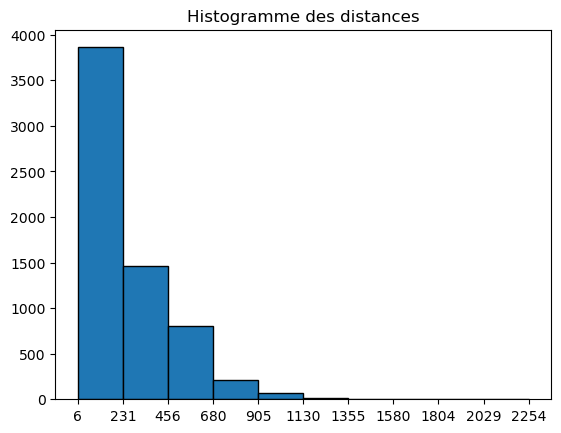

In [56]:
# Discrétisation des distances & histogramme avec np.histogram

hist_d = np.histogram(d)
print("Les effectifs respectifs de chaque barre sont : ", hist_d[0])
print("Les bornes/limites des différents intervalles sont : ", hist_d[1])

fig, ax = plt.subplots()
ax.hist(d, linewidth = 1, edgecolor = 'black') 
ax.set_title("Histogramme des distances") 
ax.set_xticks(hist_d[1])
plt.show()

224.8
[   6.   230.8  455.6  680.4  905.2 1130.  1354.8 1579.6 1804.4 2029.2
 2254. ]
11
[3861, 1465, 805, 213, 65, 13, 2, 3, 0, 1]


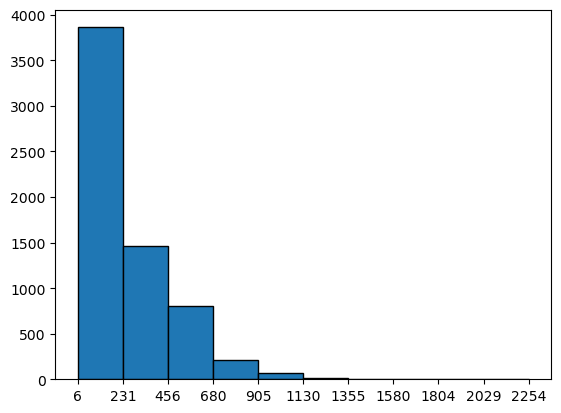

In [57]:
# Discrétisation des distances & histogramme à la main
n = 10 # nombre d'intervalles
intervalles = (np.max(d) - np.min(d))/n
print(intervalles)

limits = np.arange(np.min(d), np.max(d) + 1, intervalles)
print(limits)
print(len(limits))

# Calcul des effectifs en utilisant la fonction numpy np.where
effectif = [np.where(((d <= limits[n]) & (d > limits[n - 1])), 1, 0).sum() for n in range(1, len(limits))]
effectif[0] += np.where(d == limits[0], 1, 0).sum()

print(effectif)

# Histo à la main , affichage avec plt.bar
fig, ax = plt.subplots()
ax.bar(limits[:-1], effectif, intervalles, align='edge', linewidth = 1, edgecolor = 'black')
ax.set_xticks(limits); 

"""Les intervalles discrets ont des valeurs différentes, à l'exception des premiers et derniers qui sont les minimums et maximums. Justification : exemple d'une répartition inégale.

Le premier intervalle de l'histogramme présente une forte concentration de valeurs, ce qui entraîne également la chute de plusieurs quantiles dans cet intervalle. La borne au-dessus du premier intervalle correspond à environ la 6ème valeur, ce qui signifie que la barre correspondante représente environ 60% des valeurs. La barre 3 est occupée par le 9ème quantile, ce qui signifie que les 7 dernières barres représentent moins de 10% des valeurs.


Comme 60 % des informations sont présentes dans la première barre, il faudrait augmenter le nombre de barres pour mieux comprendre la répartition de la plupart des valeurs.
Après avoir effectué quelques tests, il semble que 30 barres soit un bon compromis, comme illustré dans la figure ci-dessous. Lorsque le nombre de barres augmente de manière excessive, on commence à constater des variations en raison du fait que nous travaillons avec un échantillon aléatoire, ce qui rend la lecture de l'histogramme plus difficile.

"""

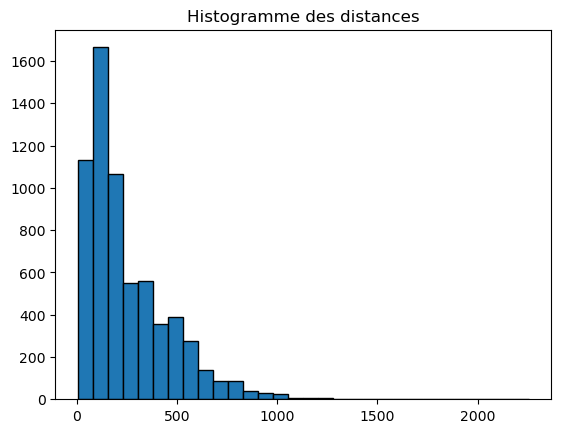

In [58]:
fig, ax = plt.subplots()
ax.hist(d, 30, linewidth = 1, edgecolor = 'black') 
ax.set_title("Histogramme des distances") 
plt.show()

## histogramme (bis)
Tracer l'histogramme des prix au km

Effectifs pour chaque barre de l'histogramme :  [5447  973    3    1    0    2    0    0    1    1]
Limites/bornes des intervalles :  [0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5    0.5625
 0.625 ]


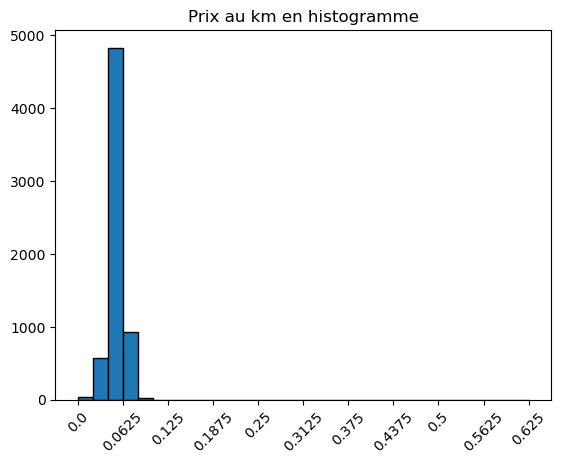

In [60]:
# Prix au km en histogramme : construction de la variable puis utilisation de np.histogramme
prix = data[:,np.array(titles_col) == 'prix'] 
prix = np.reshape(prix, -1)

prix_km = prix / d

hist_prix = np.histogram(prix_km)
print("Effectifs pour chaque barre de l'histogramme : ", hist_prix[0])
print("Limites/bornes des intervalles : ", hist_prix[1])

fig, ax = plt.subplots()
ax.hist(prix_km, 30, linewidth = 1, edgecolor = 'black') 
ax.set_title("Prix au km en histogramme") 
ax.set_xticks(hist_prix[1])
ax.set_xticklabels(hist_prix[1], rotation = 45)
plt.show()

# Distributions jointes, distributions conditionnelles

Nous voulons maintenant étudier la distribution jointe entre la distance et la marque de la voiture. Partir des distributions discrètes ou discétisées et construire le tableau d'effectif puis normaliser par les effectifs de l'échantillon pour estimer la loi jointe.

Il est diffile d'analyser cette probabilité jointe (cf ci-dessous pour l'affichage)... Nous allons donc passer à la loi conditionnelle: nous voulons donc calculer la probabilité de la distance conditionnellement à la marque de la voiture.

1. Proposer un critère rapide pour vérifier que votre distribution conditionnelle respecte bien les propriétés de base
1. Cette distribution conditionnelle fait apparaitre des pics très marqués: pouvons-nous tirer parti de ces informations?

**Note:** 
- pour afficher une matrice `p_dm`, la meilleure solution est la suivante:
> `plt.imshow(p_dm, interpolation='nearest')`
>
> `plt.show()`
- la variable `marque` est bruitée. Vous pourrez vous amuser à éliminer ou fusionner certaines catégories
- les indices dans une matrice doivent toujours être entiers. `int(...)`
- pour ajouter une description sur l'axe des x:
```python
fig, ax = plt.subplots(1,1)
plt.imshow(p_dsm, interpolation='nearest')
ax.set_xticks(np.arange(len(dico_marques)))
ax.set_xticklabels(dico_marques.keys(),rotation=90,fontsize=8)
plt.show()
```
- Si l'image est trop petite pour voir quelque chose: solution = sauvegarde en pdf (ie vectorielle) + ouverture avec un logiciel de lecture pdf
```python
plt.savefig('mafigure.pdf')
```



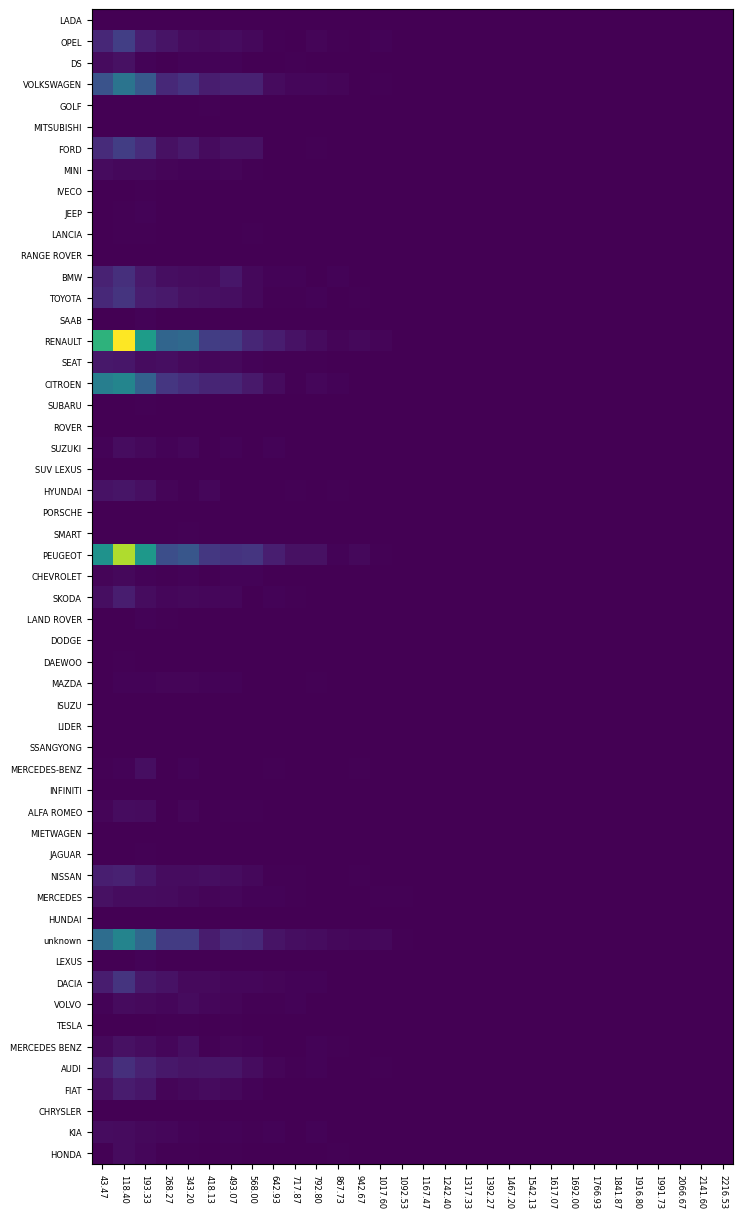

In [17]:
# loi jointe distance / marque

# construction de la distance discrétisée 
# Dimensions : = (Nind x 1) = mêmes dimensions que d
# contenu = catégorie de distance (entre 0 et 29 par exemple si on a discrétisé en 30 catégories)

distances = 30
start = d.min()
pas = (d.max() - start) / distances

nombre_marques = len(dico_marques)

# remplissage avec np.where

p_dm = np.zeros((nombre_marques, distances))

# remplissage de la matrice p_dm = double boucle + comptage
for i in range(nombre_marques):
    for j in range(distances):
        p_dm[i,j] = ((data[:, -3] == i) & (data[:, -1] > start + j * pas)\
        & (data[:, -1] <= start + (j + 1) * pas)).sum()
        
for i in range(nombre_marques):
    p_dm[i, 0] += ((data[:, -3] == i) & (data[:, -1] == start)).sum()
        
p_dm /= p_dm.sum() # normalisation

liste_des_marques = (sorted(dico_marques.items(), key = lambda kv: kv[1]))
dist_centre = np.arange(start + pas / 2, start + distances * pas, pas)

# affichage du résultat

fig, ax = plt.subplots(figsize = (15, 15))
ax.imshow(p_dm, interpolation='nearest')
ax.set_yticks(np.arange(len(dico_marques)))
ax.set_yticklabels([x[0] for x in liste_des_marques],fontsize=6)
ax.set_xticks(np.arange(distances))
ax.set_xticklabels(["{:.2f}".format(dist) for dist in dist_centre], rotation = -90, fontsize = 6)

plt.show()
 

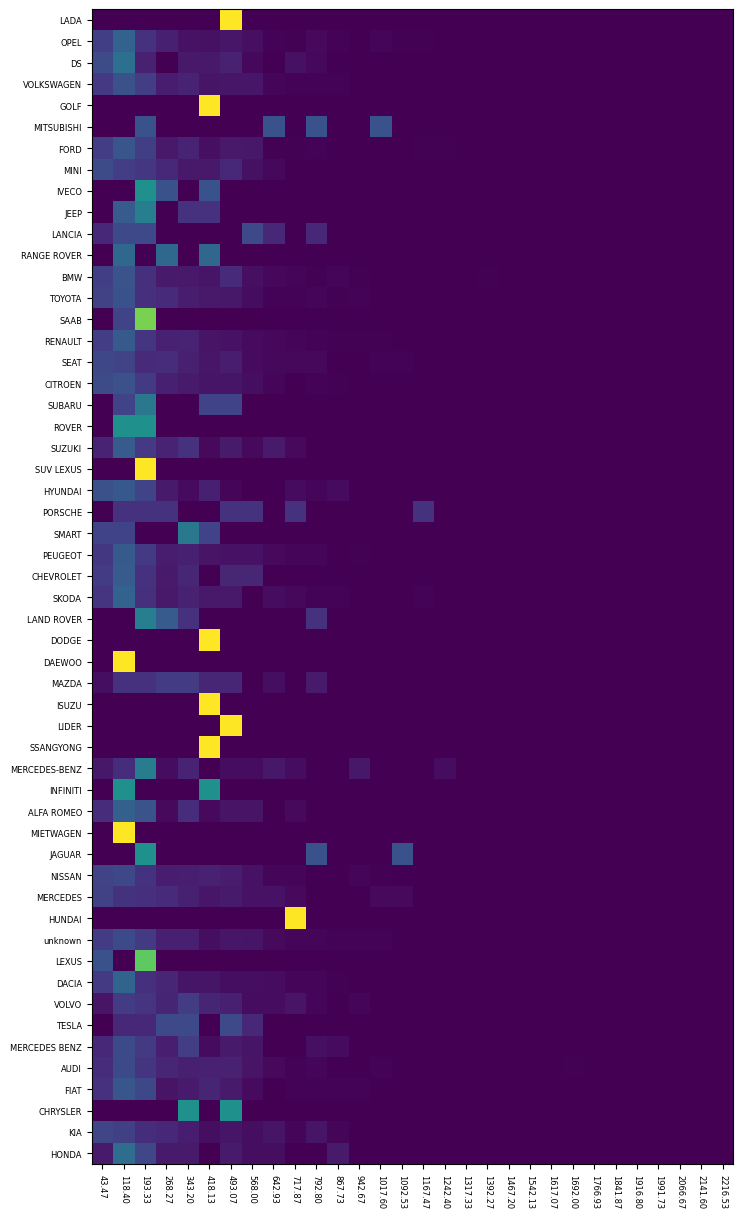

True

In [18]:
# loi conditionnelle distance | marque
# calcul de la marginale
marginale_p = p_dm.sum(1)

# calcul de la conditionnelle
p_dsm = p_dm / marginale_p.reshape((-1,1))

# affichage
fig, ax = plt.subplots(figsize = (15, 15))
ax.imshow(p_dsm, interpolation='nearest')
ax.set_yticks(np.arange(len(dico_marques)))
ax.set_yticklabels([x[0] for x in liste_des_marques],fontsize=6)
ax.set_xticks(np.arange(distances))
ax.set_xticklabels(["{:.2f}".format(dist) for dist in dist_centre], rotation = -90, fontsize = 6)

plt.show()

# un critère rapide afin de confirmer qu'il s'agit bien d'une distribution conditionnelle.

# La somme de chacun des lignes doit être égale à 1.

np.allclose(p_dsm.sum(1), 1)

## Tracé de l'ensemble de l'échantillon avec des codes couleurs

Nous proposons ensuite de tracer toutes les trajectoires des voitures blablacar. Pour cela, il faut utiliser la commande `plt.plot`.
Vous devez optenir des étoiles à partir des 7 villes requêtes: `['Paris', 'Marseille', 'Grenoble', 'Lille', 'Strasbourg', 'Nantes', 'Bordeaux']`.
Mais on ne voit pas grand chose... Et ça prend beaucoup de temps à tracer avec une boucle for. On propose donc une série d'exercice pour mieux comprendre ce qui se passe.
1. Attention à l'ordre des arguments dans le plot:
```plt.plot(tous_les_x, tous_les_y)```
Afin de tracer des trajectoires, il faut envoyer les x et les y 2 par 2 dans une boucle `for`
1. Pour éviter les boucles, il existe une méthode `quiver` dédiée au tracé de champs de vecteurs: ça ira beaucoup plus vite qu'avec plot. Il faut juste bien comprendre les mécanismes d'échelles. Pour utiliser l'échelle 1, la commande est la suivante:
```python
plt.quiver(x_dep, y_dep, delta_x, delta_y,\
            angles='xy', scale_units='xy', scale=1)
```
1. Isoler les trajets proposés à partir de chacune des villes sachant les coordonnées sont:
```python
coord = np.array([[45.18721767,  5.72345183],
 [47.22572172, -1.56558993],
 [50.63010695,  3.07071992],
 [48.5782548,   7.74078742],
 [44.83848889, -0.58156509],
 [43.2991509,   5.38925024],
 [48.8477201,   2.34607889]])
```
Chaque trajectoire (point de départ) sera rattachée à la ville la plus proche.
Une fois la distance calculée pour chaque origine de trajectoire, vous pourrez avoir besoin de `argmin`
1. Tracer les trajets d'une couleur spéciale en fonction des origines. 

Les commandes matplotlib attendent des instructions de couleur au format RGB ou avec des lettres. Je vous propose une solution élégante pour distinguer les villes.
 - soit l'index de la ville la plus proche sotcké dans `ville_or` (0,...,7)
 - construire le dictionnaire: `dict({0:'b', 1:'r', 2:'k', 3:'y', 4:'c', 5:'m', 6:'g'})`
 - transformer `ville_or` en `ville_c` en vectorisant l'appel à la table de hash:
```python
ville_c = np.vectorize(dico.get)(ville_or)
```

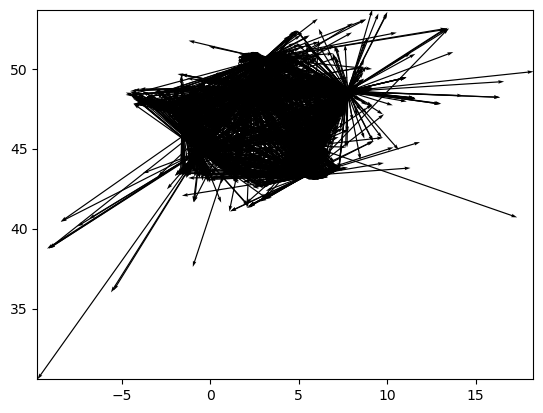

In [62]:
# représentation visuelle de toutes les routes avec un code couleur en fonction de la ville d'origine.
fig, ax = plt.subplots()

ax.quiver(data[:,7], data[:,6], data[:,9] - data[:,7], data[:,8] - data[:,6],\
           angles='xy', scale_units='xy', scale=1)
ax.set_ylim([min(data[:,6].min(), data[:,8].min()), max(data[:,6].max(), data[:,8].max())])
ax.set_xlim([min(data[:,7].min(), data[:,9].min()), max(data[:,7].max(), data[:,9].max())])

plt.show()

In [10]:
# QUESTION NON POSEE
# trouver les centres des villes
import sklearn.cluster as sk

mod = sk.KMeans(n_clusters=7,n_init=10)
mod.fit(data[:,6:8])

print(mod.cluster_centers_)

[[45.18721767  5.72345183]
 [44.83848889 -0.58156509]
 [50.63010695  3.07071992]
 [48.5782548   7.74078742]
 [47.22572172 -1.56558993]
 [43.2991509   5.38925024]
 [48.8477201   2.34607889]]


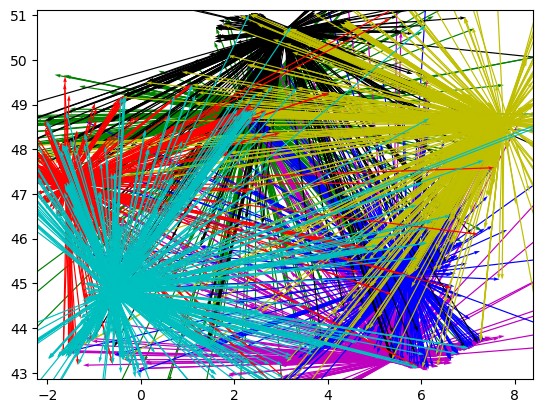

In [20]:
# trouver l'information sur la ville la plus proche

coord = np.array([[45.18721767,  5.72345183],
 [47.22572172, -1.56558993],
 [50.63010695,  3.07071992],
 [48.5782548,   7.74078742],
 [44.83848889, -0.58156509],
 [43.2991509,   5.38925024],
 [48.8477201,   2.34607889]])

# calcul de la matrice de distance (au carré)
a = data[:,6:8].reshape((data.shape[0], 2, 1)) #6428 x 2 x 1
b = coord.transpose().reshape((1, 2, coord.shape[0])) #1 x 2 x 7
m = a - b #6428 x 2 x 7
dist = m[:, 0, :]**2 + m[:, 1, :]**2
# indice de la ville d'origine du trajet (plus petite distance dans le tableau ci-dessus)
ville_or = dist.argmin(1)

# astuce pour construire une correspondance indice => code couleur
dico = dict({0:'b', 1:'r', 2:'k', 3:'y', 4:'c', 5:'m', 6:'g'})
ville_c = np.vectorize(dico.get)(ville_or)

fig, ax = plt.subplots()

ax.quiver(data[:,7], data[:,6], data[:,9] - data[:,7], data[:,8] - data[:,6],\
           angles='xy', scale_units='xy', scale=1, color= ville_c)

#ax.set_ylim([min(data[:,6].min(), data[:,8].min()), max(data[:,6].max(), data[:,8].max())])
#ax.set_xlim([min(data[:,7].min(), data[:,9].min()), max(data[:,7].max(), data[:,9].max())])

plt.show()

## Etude de la corrélation entre variables

On propose d'étudier la corrélation entre la distance du trajet et le nombre d'étoiles de confort. Attention, les étoiles ne sont pas toujours renseignées (-1 = inconnu). On fera aussi ces opérations entre la distance et le prix.

1. Tracer dans le plan les coordonnées (distance,etoile) pour les points concernés

Vous utiliserez la commande `scatter` pour réaliser l'opération
1. Calculer le coefficient de corrélation entre les deux variables aléatoires


In [21]:
print(len(titles_col), titles_col) 

14 ['annee', 'mois', 'jour', 'heure', 'dep_ville', 'arr_ville', 'dep_coord_x', 'dep_coord_y', 'arr_coord_x', 'arr_coord_y', 'prix', 'marque', 'stars_confort', 'distance']


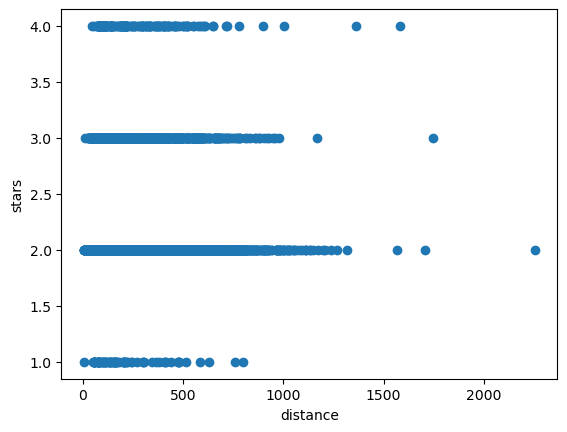

[[1.         0.04876703]
 [0.04876703 1.        ]]


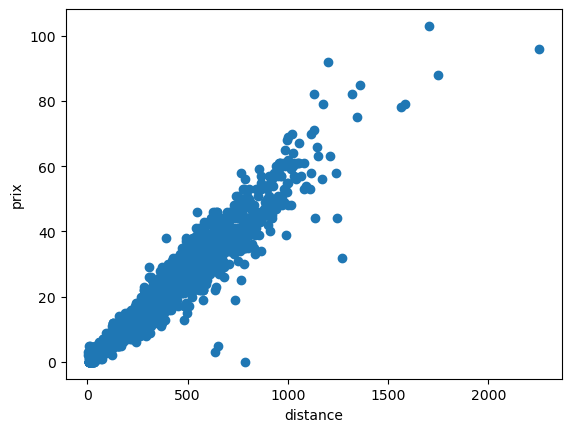

[[1.         0.97286188]
 [0.97286188 1.        ]]


In [22]:
fig, ax = plt.subplots()
# test de corrélation entre la distance et le confort de la voiture
# affichage du nuage de points correspondant au deux variables
star = data[:,-2]
dist = data[:,-1]
dist = dist[star != -1]
star = star[star != -1]

ax.scatter(dist, star)
ax.set_xlabel("distance")
ax.set_ylabel("stars")

plt.show()

# calcul du coefficient de corrélation pour tous les points admissibles 
# (ceux pour lesquels les étoiles sont renseignées)

print(np.corrcoef(dist, star))

# test de corrélation entre la distance et le prix
# affichage du nuage de points correspondant au deux variables
fig, ax = plt.subplots()

ax.scatter(data[:,-1], data[:,-4])
ax.set_xlabel("distance")
ax.set_ylabel("prix")

plt.show()

# calcul du coefficient de corrélation pour tous les points admissibles 

print(np.corrcoef(data[:,-1], data[:,-4]))

## Quelques questions supplémentaires

### prix au kilomètre en fonction de l'origine
On s'interroge sur le prix des courses en fonction des villes de départ. On ne veut pas tomber dans des pièges liés à des résumés
simplistes, nous allons donc calculer la distribution conditionnlle P(prix_km|ville_origine).
1. Calculer le prix au km
2. Discrétiser
3. Calculer (par simple comptage) la loi jointe
4. Afficher la loi conditionnelle
   
En l'état, nous avons du mal à analyser les données. Ceci est du aux valeurs extrêmes (notamment hautes). Afin de rendre l'analyse
robuste, seuiller le prix au km au 99ème percentile (toutes les valeurs supérieures sont ramenées à cette valeur limite).


## même analyse pour voir dans quelle ville les gens sont plus matinaux, s'ils partent plus vers le sud ou le nord, l'est ou l'ouest...

Si vous étiez un journaliste en manque de sujet de reportage, quel(s) graphique(s) calculeriez vous à partir de ces données?

In [27]:
def discretisation(x, nintervalles, eps = 0.0000001) :
    inter = (np.max(x) - np.min(x))/nintervalles
    limits = np.arange(np.min(x), np.max(x) + eps, inter)
    # calcul des effectifs avec np.where
    effectif = [np.where(((x <= limits[n]) & (x > limits[n - 1])), 1, 0).sum() for n in range(1, len(limits))]
    effectif[0] += np.where(x == limits[0], 1, 0).sum()  
    xd = (x - np.min(x)) // inter
    xd = np.vectorize(int)(xd)
    return limits, effectif, xd

def pjointe(xd, yd): # variable codées de 0 à valmax
    
# remplissage avec np.where

    pj = np.zeros((np.max(xd) + 1, np.max(yd) + 1))

    # remplissage de la matrice pj = double boucle + comptage
    for i in range(pj.shape[0]):
        for j in range(pj.shape[1]):
            pj[i,j] = ((xd == i) & (yd == j)).sum()

    pj /= pj.sum() # normalisation
    return pj

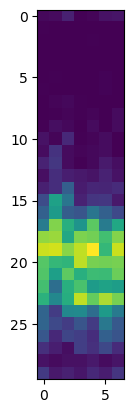

In [28]:
# prix km
pkm = data[:,-4]/data[:,-1]
n = 30 # nb catégories

# robustesse : calcul du 99è percentile et seuillage des valeurs
quant_99 = (np.percentile(pkm, 99))
pkm = np.where(pkm > quant_99, quant_99, pkm)

limits, effectif, pkmd = discretisation(pkm, n)

pj = pjointe(pkmd,ville_or)

pv = pj.sum(0)      # calcul de la marginale
p_km_s_v = pj / pv.reshape((1, -1)) # calcul de la conditionnelle

fig, ax = plt.subplots()
ax.imshow(p_km_s_v, interpolation='nearest')
plt.show()

# analyses

On voit que la loi conditionnelle ne semble pas trop dependre de la ville de depart, à part la colonne d'indice 1 ou les prix/km sont un peu moins elevés.

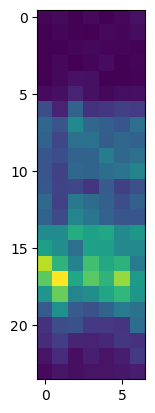

In [61]:
pj = pjointe(np.vectorize(int)(data[:,3]),ville_or)
# On détermine la marginale
pv = pj.sum(0)      
 # On détermine la conditio
p_km_s_v = pj / pv.reshape((1, -1))

fig, ax = plt.subplots()
ax.imshow(p_km_s_v, interpolation='nearest')
plt.show()

Il est observé que les voyageurs ont généralement l'habitude de partir dans l'après-midi, entre 16h et 18h. La loi communautaire ne semble pas très influencée par la ville, car les colonnes sont similaires, sauf dans la ville d'indice 1, où les départs semblent plus tardifs que la moyenne, et dans la ville d'indice 2, où les départs sont moins nombreux l'après-midi et plus nombreux le matin.